<a href="https://colab.research.google.com/github/DevpriyaSaini/ML-100/blob/main/softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=sns.load_dataset('iris')

In [16]:
df.shape

(150, 5)

In [12]:
encoder=LabelEncoder()
df['species']=encoder.fit_transform(df['species'])

In [15]:
df.head(1000)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
df['species'].unique()

array([0, 1, 2])

In [22]:
df=df[['sepal_length','petal_length','species']]

In [23]:
df.head(5)

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [24]:
x_test,x_train,y_test,y_train=train_test_split(df.drop('species',axis=1),df['species'],test_size=0.2,random_state=42)

In [29]:
reg=LogisticRegression(multi_class='multinomial',solver='lbfgs')

In [30]:
reg.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [31]:
y_pred=reg.predict(x_test)

In [32]:
accuracy_score(y_test,y_pred)

0.875

In [33]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,40,0,0
1,0,35,6
2,0,9,30


In [34]:
query=np.array([[3.4,2.7]])
reg.predict_proba(query)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.30544063e-01, 2.68909967e-01, 5.45969408e-04]])

In [35]:
reg.predict(query)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


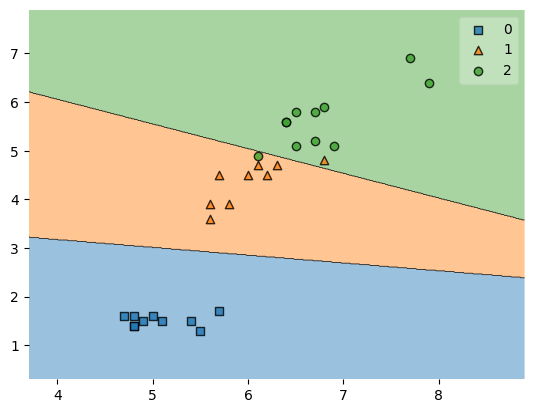

In [36]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train.values,y_train.values,clf=reg)
plt.show()